In [1]:
#download the file tfdl_env.yml and move it to folder of your choice
#Open your terminal cd to the folder in which the file is saved and run "source activate tfdeeplearning" (MacOS) or
#"activate tfdeeplearning" (Windows)
import tensorflow as tf

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import os
from option_prediction import OUTPUT_FOLDER
from Option_Accuracy_Analysis import OUTPUT_FOLDER_CPSP
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from TF_Setup import tf_setup

/Users/xpatricklorenzx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
OUTPUT_FOLDER_TF = "Tensorflow_DataFrame_csv"
try:
    os.mkdir(OUTPUT_FOLDER_TF)
except FileExistsError:
    pass

In [3]:
tf_setup(OUTPUT_FOLDER_CPSP=OUTPUT_FOLDER_CPSP, output_folder_tf=OUTPUT_FOLDER_TF, export_table=True)

Exported: Tensorflow_DataFrame_csv/2020_09_19/Tensorflow_DataFrame_csv_2020_09_19.csv


,Tickers,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,MarketCap,Beta,1W %Change,50 Day MA,MA to TP %,Sharpe Ratio,30day Vol,95% VaR,predicted Direction
0,AAL,0,12.940000,14.093685,12.950000,8.915656,0.077282,8.838375,6.596036096000001,1.7541799999999999,-2.116400,12.490200,-3.550578,-8.004599,4.232225,-13.98,Correct
1,AAL,1,13.005000,14.067043,12.950000,8.166418,-0.422917,8.589335,6.613835776,1.7541799999999999,-0.725193,12.487300,-3.980777,-7.957495,4.239918,-13.98,False
2,AAL,2,13.050000,14.173824,12.950000,8.611678,-0.766286,9.377965,6.636721152000001,1.7541799999999999,0.000000,12.488600,-4.301917,-7.916577,4.312529,-14.01,False
3,AAL,3,13.630000,13.857185,12.950000,1.666800,-4.988997,6.655797,6.9316864,1.7541799999999999,0.294334,12.494000,-8.334557,-7.821663,4.408780,-13.96,False
4,AAL,4,13.610000,13.889963,12.950000,2.057040,-4.849374,6.906415,6.921515008,1.75418,2.484939,12.469000,-8.383539,NaN,4.403063,-13.99,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,ZM,7,382.010010,343.660636,438.730011,-10.038840,14.847779,-24.886619,108.884885504,NaN,-9.575975,285.734199,-25.395771,83.038430,5.828215,-9.80,False
596,ZM,8,384.480011,338.960428,438.730011,-11.839259,14.109966,-25.949225,109.3541888,NaN,-15.995541,283.256799,-26.327302,86.821726,5.823968,-9.79,False
597,ZM,9,389.649994,326.577595,438.730011,-16.186937,12.595924,-28.782861,110.824636416,NaN,19.855425,280.637999,-27.976902,88.062233,5.695144,-9.80,False
598,ZM,10,350.880005,336.712712,438.730011,-4.037646,25.037051,-29.074697,99.79763916799999,NaN,17.245303,277.816199,-20.823018,77.926524,5.636624,-9.74,False


In [5]:
stock_price_prediction = pd.read_csv("Tensorflow_DataFrame_csv/2020_09_19/Tensorflow_DataFrame_csv_2020_09_19.csv",\
                                     index_col=0)

In [3]:
#Load in Data and adjust columns to TF requirements (No spaces, spec characters, etc)
stock_price_prediction = stock_price_prediction.replace("T E", 0)
stock_price_prediction = stock_price_prediction.replace("I E", 0)
stock_price_prediction = stock_price_prediction.fillna(0)

stock_price_prediction_tidy = stock_price_prediction.rename(columns = \
                                                            {"Price @ DtE": "Price_at_DtE",\
                                                             "Actual Price @ Expiry": "Actual_Price_at_Expiry",\
                                                            "Expected %Change": "Expected_Pct_Change",\
                                                            "Actual %Change": "Actual_Pct_Change",\
                                                             "Expected - Actual": "Expected_delta_Actual",\
                                                             "1W %Change": "One_week_pct_change",\
                                                            "50 Day MA": "Fifty_Day_MA",\
                                                            "MA to TP %":"MA_to_TP_Pct",\
                                                            "30day Vol":"Thirty_day_Vol",\
                                                             "Sharpe Ratio":"Sharpe_Ratio",\
                                                            "95% VaR": "VaR",\
                                                            "predicted Direction":"predicted_Direction"})

In [25]:
stock_price_prediction_tidy

,Tickers,Days_to_Exp,Price_at_DtE,CPSP,Actual_Price_at_Expiry,Expected_Pct_Change,Actual_Pct_Change,Expected_delta_Actual,MarketCap,Beta,One_week_pct_change,Fifty_Day_MA,MA_to_TP_Pct,Sharpe_Ratio,Thirty_day_Vol,VaR,predicted_Direction
0,AAL,0,12.940000,14.093685,12.95,8.915656,0.077282,8.838375,6.596036096000001,1.7541799999999999,-2.116400,12.490200,-3.550578,-8.004599,4.232225,-13.98,Correct
1,AAL,1,13.005000,14.067043,12.95,8.166418,-0.422917,8.589335,6.613835776,1.7541799999999999,-0.725193,12.487300,-3.980777,-7.957495,4.239918,-13.98,False
2,AAL,2,13.050000,14.173824,12.95,8.611678,-0.766286,9.377965,6.636721152000001,1.7541799999999999,0.000000,12.488600,-4.301917,-7.916577,4.312529,-14.01,False
3,AAL,3,13.630000,13.857185,12.95,1.666800,-4.988997,6.655797,6.9316864,1.7541799999999999,0.294334,12.494000,-8.334557,-7.821663,4.408780,-13.96,False
4,AAL,4,13.610000,13.889963,12.95,2.057040,-4.849374,6.906415,6.921515008,1.75418,2.484939,12.469000,-8.383539,0.000000,4.403063,-13.99,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ZM,0,382.010010,387.243126,383.00,1.369890,0.259153,1.110737,108.884885504,0,-9.575975,285.734199,-25.395771,83.038430,5.828215,-9.80,Correct
196,ZM,1,384.480011,388.809711,383.00,1.126118,-0.384938,1.511057,109.3541888,0,-15.995541,283.256799,-26.327302,86.821726,5.823968,-9.79,False
197,ZM,2,389.649994,380.711124,383.00,-2.294077,-1.706658,-0.587418,110.824636416,0,19.855425,280.637999,-27.976902,88.062233,5.695144,-9.80,Correct
198,ZM,3,350.880005,371.154644,383.00,5.778226,9.154125,-3.375899,99.79763916799999,0,17.245303,277.816199,-20.823018,77.926524,5.636624,-9.74,Correct


In [5]:
#Separate and select data as preferred
y_val = stock_price_prediction_tidy["Actual_Price_at_Expiry"]

x_data = stock_price_prediction_tidy.drop(["Tickers", "Expected_delta_Actual","Actual_Pct_Change",\
                                           "Actual_Price_at_Expiry",\
                                           "predicted_Direction"],\
                                          axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_val, test_size=0.2, random_state=101)
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
#Adjust data to Tensorflow environment
X_train = pd.DataFrame(data=scaler.transform(X_train), \
                      columns=X_train.columns,\
                      index=X_train.index)

X_test = pd.DataFrame(data=scaler.transform(X_test), \
                      columns=X_test.columns,\
                      index=X_test.index)

dte = tf.feature_column.numeric_column('Days_to_Exp')
dte_price = tf.feature_column.numeric_column('Price_at_DtE')
cpsp = tf.feature_column.numeric_column('CPSP')
exp_change = tf.feature_column.numeric_column('Expected_Pct_Change')
week_change = tf.feature_column.numeric_column('One_week_pct_change')
market_cap = tf.feature_column.numeric_column('MarketCap')
beta = tf.feature_column.numeric_column('Beta')
day_MA = tf.feature_column.numeric_column('Fifty_Day_MA')
MA_to_AP_pct = tf.feature_column.numeric_column('MA_to_TP_Pct')
sharpe = tf.feature_column.numeric_column('Sharpe_Ratio')
day_Vol = tf.feature_column.numeric_column('Thirty_day_Vol')
VaR = tf.feature_column.numeric_column('VaR')

feat_cols = [dte, dte_price, cpsp, exp_change, week_change, market_cap, beta, \
             day_MA, MA_to_AP_pct, sharpe, day_Vol, VaR]

In [7]:
#Write input function and estimator model (variables: layers and hidden units)
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, 
                                                 y=y_train,
                                                batch_size=10,
                                                num_epochs=1000,
                                                shuffle=True)

model = tf.estimator.DNNRegressor(hidden_units=[6,6,6,6], feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_experimental_distribute': None, '_log_step_count_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a2d384208>, '_task_id': 0, '_is_chief': True, '_model_dir': '/var/folders/r_/l39j9z1j6bx3g1s30j_9rtx40000gn/T/tmpc0s7167a', '_num_worker_replicas': 1, '_save_checkpoints_steps': None, '_task_type': 'worker', '_service': None, '_session_creation_timeout_secs': 7200, '_experimental_max_worker_delay_secs': None, '_keep_checkpoint_max': 5, '_train_distribute': None, '_device_fn': None, '_tf_random_seed': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_master': '', '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_global_id_in_cluster': 0, '_protocol': None, '_evaluation_master': '', '_eval_distribute': None, '_num_ps_replicas': 0}


In [8]:
#Train the model
model.train(input_fn=input_func, steps = 16000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Savi

INFO:tensorflow:global_step/sec: 151.75
INFO:tensorflow:loss = 2947.587, step = 4601 (0.670 sec)
INFO:tensorflow:global_step/sec: 123.751
INFO:tensorflow:loss = 3068.2812, step = 4701 (0.800 sec)
INFO:tensorflow:global_step/sec: 140.791
INFO:tensorflow:loss = 5537.7397, step = 4801 (0.712 sec)
INFO:tensorflow:global_step/sec: 103.167
INFO:tensorflow:loss = 2364.5552, step = 4901 (0.963 sec)
INFO:tensorflow:global_step/sec: 133.496
INFO:tensorflow:loss = 2962.6216, step = 5001 (0.771 sec)
INFO:tensorflow:global_step/sec: 136.179
INFO:tensorflow:loss = 1301.623, step = 5101 (0.724 sec)
INFO:tensorflow:global_step/sec: 93.1171
INFO:tensorflow:loss = 4754.2354, step = 5201 (1.066 sec)
INFO:tensorflow:global_step/sec: 114.265
INFO:tensorflow:loss = 3965.5513, step = 5301 (0.890 sec)
INFO:tensorflow:global_step/sec: 136.298
INFO:tensorflow:loss = 3749.1113, step = 5401 (0.718 sec)
INFO:tensorflow:global_step/sec: 102.099
INFO:tensorflow:loss = 2471.406, step = 5501 (0.980 sec)
INFO:tensorflo

INFO:tensorflow:loss = 1249.0426, step = 12301 (0.661 sec)
INFO:tensorflow:global_step/sec: 107.193
INFO:tensorflow:loss = 815.6037, step = 12401 (0.929 sec)
INFO:tensorflow:global_step/sec: 128.551
INFO:tensorflow:loss = 3204.8813, step = 12501 (0.766 sec)
INFO:tensorflow:global_step/sec: 139.467
INFO:tensorflow:loss = 1249.7087, step = 12601 (0.720 sec)
INFO:tensorflow:global_step/sec: 119.63
INFO:tensorflow:loss = 1139.9163, step = 12701 (0.835 sec)
INFO:tensorflow:global_step/sec: 142.828
INFO:tensorflow:loss = 581.56177, step = 12801 (0.703 sec)
INFO:tensorflow:global_step/sec: 157.94
INFO:tensorflow:loss = 198.94139, step = 12901 (0.639 sec)
INFO:tensorflow:global_step/sec: 146.156
INFO:tensorflow:loss = 886.51154, step = 13001 (0.676 sec)
INFO:tensorflow:global_step/sec: 156.062
INFO:tensorflow:loss = 333.60614, step = 13101 (0.640 sec)
INFO:tensorflow:global_step/sec: 144.364
INFO:tensorflow:loss = 801.8882, step = 13201 (0.698 sec)
INFO:tensorflow:global_step/sec: 124.767
INFO

In [9]:
#Run prediction of the tensorflow algorithm to check how accurate the predictions were
predict_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,\
                                                        batch_size=10,\
                                                        num_epochs=1,\
                                                        shuffle = False)

pred_gen = model.predict(predict_input_func)

predictions = list(pred_gen)

#Final_preds is a list of predictions tensorflow did with the X_train as input
final_preds = []

for pred in predictions:
    final_preds.append(pred["predictions"])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/r_/l39j9z1j6bx3g1s30j_9rtx40000gn/T/tmpc0s7167a/model.ckpt-16000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [10]:
#predictions
#y_test
#stock_price_prediction_tidy.describe()

In [11]:
#Check for accuracy of the predictive model with the Y-Test data using RMSE and R^2
rmse = mean_squared_error(y_test, final_preds)**0.5

tf_accuracy = 100-(rmse / stock_price_prediction_tidy["Actual_Price_at_Expiry"].mean())*100
tf_r2 = r2_score(y_test, final_preds)
print("The Root Mean Squared Error: ", rmse)
print("The RMSE in relation to mean value: ", tf_accuracy,"%")
print("The R-Squared Score: ",tf_r2)

The Root Mean Squared Error:  6.922602365712964
The RMSE in relation to mean value:  97.422879745935 %
The R-Squared Score:  0.9971127319958633


In [29]:
#Check how often the direction of the prediction was accurate (a predicted buy was actually a buy in hindsight)
index_list = np.arange(0,np.shape(final_preds)[0],1)

final_preds_list = []

for y in index_list:
    final_preds_index = final_preds[y][0]
    final_preds_list.append(final_preds_index)

Tensorflow_Acc = pd.DataFrame({"Actual Prices":y_test, "Tensorflow Prices": final_preds_list})
tf_df_merged = pd.merge(stock_price_prediction_tidy, Tensorflow_Acc, right_index=True, left_index=True, how='inner')
tf_price_predictions = tf_df_merged[["Tickers","Days_to_Exp","Price_at_DtE","Actual Prices","Tensorflow Prices"]]

ePredictions = []
aPredictions = []

for x,y in zip(tf_price_predictions["Price_at_DtE"],tf_price_predictions["Actual Prices"]):
    if x < y:
        ePredictions.append("buy")
    else:
        ePredictions.append("sell")

for x,y in zip(tf_price_predictions["Price_at_DtE"],tf_price_predictions["Tensorflow Prices"]):
    if x < y:
        aPredictions.append("buy")
    else:
        aPredictions.append("sell")

Prediction = []
for x,y in zip(ePredictions, aPredictions):
    if x == y:
        Prediction.append("Correct")
    else:
        Prediction.append("False")

shape = np.shape(tf_price_predictions)[0]
da = Prediction.count("Correct")/shape*100

print("Tensorflow correctly predicted",Prediction.count("Correct"), "out of",shape," hence a ",da,"% Accuracy" )
print(Prediction.count("False"), "incorrectly predicted out of", shape)
tf_price_predictions["Hindsight Prediction"] = ePredictions
tf_price_predictions["Tensorflow Prediction"] = aPredictions
tf_price_predictions["predicted Direction Accuracy"] = Prediction



Tensorflow correctly predicted 26 out of 40  hence a  65.0 % Accuracy
14 incorrectly predicted out of 40


/Users/xpatricklorenzx/opt/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xpatricklorenzx/opt/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xpatricklorenzx/opt/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,Tickers,Days_to_Exp,Price_at_DtE,Actual Prices,Tensorflow Prices,Hindsight Prediction,Tensorflow Prediction,predicted Direction Accuracy
2,AAL,2,13.050000,12.950000,13.847249,sell,buy,False
12,AMD,2,81.910004,76.339996,77.997513,sell,sell,Correct
22,ATVI,2,79.589996,77.970001,80.838867,sell,buy,False
25,BA,0,160.029999,160.229996,153.347549,buy,sell,False
31,BABA,1,267.549988,271.609985,269.304474,buy,buy,Correct
32,BABA,2,273.149994,271.609985,272.660217,sell,sell,Correct
34,BABA,4,281.390015,271.609985,267.574158,sell,sell,Correct
37,BYND,2,138.169998,134.880005,134.931046,sell,sell,Correct
39,BYND,4,125.820000,134.880005,114.482826,buy,sell,False
41,C,1,50.950001,51.000000,48.753902,buy,sell,False


In [70]:
#Calculate the expected return if all trades would have been executed as predicted by TF
tf_price_predictions["Actual_gain"] = ((tf_price_predictions["Actual Prices"] - tf_price_predictions["Price_at_DtE"])\
                                   / tf_price_predictions["Price_at_DtE"])*100

tf_price_predictions["Expected_gain"] = ((tf_price_predictions["Tensorflow Prices"] - \
                                          tf_price_predictions["Price_at_DtE"]) / \
                                         tf_price_predictions["Price_at_DtE"])*100

Index_label_tf = tf_price_predictions[tf_price_predictions['Tensorflow Prediction']=="buy"].index.tolist()
Index_label_correct = tf_price_predictions[tf_price_predictions['predicted Direction Accuracy']\
                                           =="Correct"].index.tolist()

index_merged_list_correct = []

for x in Index_label_tf:
    if x in Index_label_correct:
        index_merged_list_correct.append(x)

Index_label_false = tf_price_predictions[tf_price_predictions['predicted Direction Accuracy']=="False"].index.tolist()

index_merged_list_false = []

for x in Index_label_tf:
    if x in Index_label_false:
        index_merged_list_false.append(x)

gain_total = []

for x in index_merged_list_correct:
    rowData = tf_price_predictions.loc[x, "Actual_gain"]
    gain_total.append(rowData)
    
prediction_mean_gain = np.mean(gain_total)

loss_total = []

for x in index_merged_list_false:
    rowData = tf_price_predictions.loc[x, "Actual_gain"]
    loss_total.append(rowData)
    
prediction_mean_loss = np.mean(loss_total)

Expected_Value = round((prediction_mean_gain * (da/100)) + (prediction_mean_loss * (1-(da/100))),3)

print("The Expected Value for all executed trades is ",Expected_Value,"% per week")
Expected_Value_yearly = Expected_Value * 52
print("This implies a yearly Risk Free Rate of Return of ", Expected_Value_yearly, "% without compounding")

The Expected Value for all executed trades is  0.798 % per week
This implies a yearly Risk Free Rate of Return of  41.496 % without compounding


/Users/xpatricklorenzx/opt/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/xpatricklorenzx/opt/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


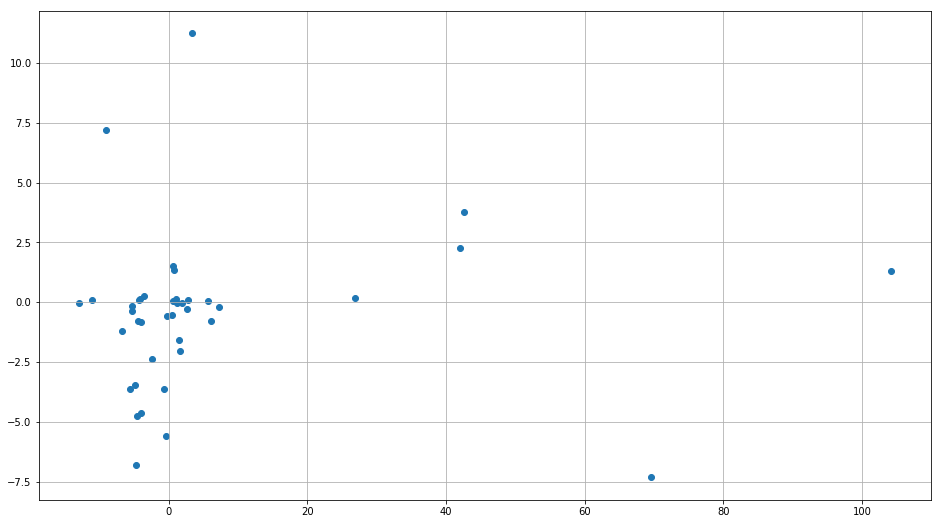

In [73]:
#Plotting Expected Gain by TF vs Actual Gain
plt.figure(figsize= (16,9))
plt.scatter(tf_price_predictions["Expected_gain"], tf_price_predictions["Actual_gain"])
plt.grid()